In [18]:

%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import optuna
import matplotlib.pyplot as plt


In [2]:
# Read the Dataset
df = pd.read_csv('../datasets/PCOS_data.csv')

In [3]:
# Display basic information and the first few rows
print(df.info())
display(df.head())

# Generate descriptive statistics
display(df.describe())

# Check for missing values
print(df.isnull().sum())

# Display cleaned column names for reference
print(df.columns.tolist())

# Normalize column names
df.columns = df.columns.str.strip().str.replace(' ', '_')
print(df.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  Pimples(Y/N)  \
0  19.3           15                78                22  ...             0   
1  24.9           15                74                20  ...             0   
2  25.3           11                72                18  ...             1   
3  29.7           13                72                20  ...             0   
4  20.1           11                72                18  ...             0   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110   
1              0.0                  0                  120   
2              1.0                  0                  120   
3              0.0                  0                  120   
4              0.0                  0                  120   

   BP _Diastolic (mmHg)  Follicle No. (L)  Follicle No. (R)  \
0                    80                 3                 3   
1                    70                 3                 5   
2                    80                13                15   
3                    70                 2                 2   
4                    80                 3                 4   

  Avg. F size (L) (mm)  Avg. F size (R) (mm)  Endometrium (mm)  
0                 18.0                  18.0               8.5  
1                 15.0                  14.0               3.7  
2                 18.0                  20.0              10.0  
3                 15.0                  14.0               7.5  
4                 16.0                  14.0               7.0  

[5 rows x 44 columns]

Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
count  541.000000        541.000000  541.000000  541.000000   541.000000   
mean   271.000000        271.000000    0.327172   31.430684    59.637153   
std    156.317519        156.317519    0.469615    5.411006    11.028287   
min      1.000000          1.000000    0.000000   20.000000    31.000000   
25%    136.000000        136.000000    0.000000   28.000000    52.000000   
50%    271.000000        271.000000    0.000000   31.000000    59.000000   
75%    406.000000        406.000000    1.000000   35.000000    65.000000   
max    541.000000        541.000000    1.000000   48.000000   108.000000   

       Height(Cm)          BMI  Blood Group  Pulse rate(bpm)   \
count   541.000000  541.000000   541.000000        541.000000   
mean    156.484835   24.307579    13.802218         73.247689   
std       6.033545    4.055129     1.840812          4.430285   
min     137.000000   12.400000    11.000000         13.000000   
25%     152.000000   21.600000    13.000000         72.000000   
50%     156.000000   24.200000    14.000000         72.000000   
75%     160.000000   26.600000    15.000000         74.000000   
max     180.000000   38.900000    18.000000         82.000000   

       RR (breaths/min)  ...  Pimples(Y/N)  Fast food (Y/N)  \
count        541.000000  ...    541.000000       540.000000   
mean          19.243993  ...      0.489834         0.514815   
std            1.688629  ...      0.500359         0.500244   
min           16.000000  ...      0.000000         0.000000   
25%           18.000000  ...      0.000000         0.000000   
50%           18.000000  ...      0.000000         1.000000   
75%           20.000000  ...      1.000000         1.000000   
max           28.000000  ...      1.000000         1.000000   

       Reg.Exercise(Y/N)  BP _Systolic (mmHg)  BP _Diastolic (mmHg)  \
count         541.000000           541.000000            541.000000   
mean            0.247689           114.661738             76.927911   
std             0.432070             7.384556              5.574112   
min             0.000000            12.000000              8.000000   
25%             0.000000           110.000000             70.000000   
50%             0.000000           110.000000             80.000000   
75%             0.000000           120.000000             80.000000   
max             1.000000           140.000000            100.000000   

       Follicle No. (L)  Follicle No. (R)  Avg. F size (L) (mm)  \
count        541.000000        541.000000            541.000000   
mean           6.129390          6.641405             15.018115   
std            4.229294          4.436889              3.566839   
min            0.000000          0.000000              0.000000   
25%            3.000000          3.000000             13.000000   
50%            5.000000          6.000000             15.000000   
75%            9.000000         10.000000             18.000000   
max           22.000000         20.000000             24.000000   

       Avg. F size (R) (mm)  Endometrium (mm)  
count            541.000000        541.000000  
mean              15.451701          8.475915  
std                3.318848          2.165381  
min                0.000000          0.000000  
25%               13.000000          7.000000  
50%               16.000000          8.500000  
75%               18.000000          9.800000  
max               24.000000         18.000000  

[8 rows x 42 columns]

Sl. No                    0
Patient File No.          0
PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)     

In [4]:
# Normalize column names
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [5]:
# Correctly handle numeric columns with special characters and potential non-numeric data
numeric_columns = ['BMI', 'Age_(yrs)', 'Weight_(Kg)', 'Waist:Hip_Ratio', 
                   'I___beta-HCG(mIU/mL)', 'II____beta-HCG(mIU/mL)', 
                   'FSH(mIU/mL)', 'LH(mIU/mL)', 'AMH(ng/mL)', 
                   'Cycle_length(days)', 'Endometrium_(mm)', 
                   'BP__Systolic_(mmHg)', 'BP__Diastolic_(mmHg)',
                   'Follicle_No._(L)', 'Follicle_No._(R)', 'Avg._F_size_(L)_(mm)', 'Avg._F_size_(R)_(mm)']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].replace(r'^\.+$', '', regex=True), errors='coerce')
    df[col] = df[col].fillna(df[col].median())

# Handle categorical columns and fill missing values with mode
categorical_columns = ['PCOS_(Y/N)', 'Weight_gain(Y/N)', 
                       'hair_growth(Y/N)', 'Skin_darkening_(Y/N)', 
                       'Hair_loss(Y/N)', 'Pimples(Y/N)', 
                       'Fast_food_(Y/N)', 'Reg.Exercise(Y/N)', 
                       'Blood_Group']

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill missing numeric values with median
df.fillna(df.median(), inplace=True)

In [6]:
# Feature engineering
df['BMI_range'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')], labels=[0, 1, 2, 3])
df['Age_group'] = pd.cut(df['Age_(yrs)'], bins=[0, 30, 40, 50, float('inf')], labels=[0, 1, 2, 3])

# Select features and target (follicle and hormone-related features)
X = df[['Follicle_No._(L)', 'Follicle_No._(R)', 'Avg._F_size_(L)_(mm)', 'Avg._F_size_(R)_(mm)', 
        'Endometrium_(mm)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'BMI', 'Age_(yrs)', 'AMH(ng/mL)']]
y = df['PCOS_(Y/N)']  # Target column

In [7]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Define the objective function for Optuna to optimize XGBoost
def xgb_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
    }
    model = XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss')
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

# Define the objective function for Optuna to optimize LightGBM
def lgbm_objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0)
    }
    model = LGBMClassifier(**params)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score

# Define the objective function for Optuna to optimize CatBoost
def catboost_objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 500),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
    }
    model = CatBoostClassifier(**params, verbose=0)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score


In [10]:
# Run the optimization process for XGBoost
study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(xgb_objective, n_trials=50)
best_xgb_params = study_xgb.best_trial.params

[I 2024-10-13 00:33:47,460] A new study created in memory with name: no-name-bbbccfe8-d651-46a1-97f0-7ac12219eed0
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:33:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:33:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:33:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\

In [11]:
# Run the optimization process for LightGBM
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(lgbm_objective, n_trials=50)
best_lgbm_params = study_lgbm.best_trial.params

[I 2024-10-13 00:34:01,127] A new study created in memory with name: no-name-f701b723-4de7-4029-b542-7a3d578ee3cc
[I 2024-10-13 00:34:01,333] Trial 0 finished with value: 0.8309275594760759 and parameters: {'n_estimators': 261, 'max_depth': 4, 'learning_rate': 0.15233189748720913, 'num_leaves': 52, 'subsample': 0.6915605575495167}. Best is trial 0 with value: 0.8309275594760759.


[LightGBM] [Info] Number of positive: 113, number of negative: 232
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 345, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.327536 -> initscore=-0.719350
[LightGBM] [Info] Start training from score -0.719350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-10-13 00:34:01,632] Trial 1 finished with value: 0.8263031275060145 and parameters: {'n_estimators': 375, 'max_depth': 10, 'learning_rate': 0.12950146036993737, 'num_leaves': 68, 'subsample': 0.702937223980524}. Best is trial 0 with value: 0.8309275594760759.
[I 2024-10-13 00:34:01,762] Trial 2 finished with value: 0.8285485164394547 and parameters: {'n_estimators': 141, 'max_depth': 8, 'learning_rate': 0.21672595649781023, 'num_leaves': 132, 'subsample': 0.8472439706673963}. Best is trial 0 with value: 0.8309275594760759.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:02,078] Trial 3 finished with value: 0.8332264100507885 and parameters: {'n_estimators': 422, 'max_depth': 10, 'learning_rate': 0.13719693776199351, 'num_leaves': 108, 'subsample': 0.8534533286599317}. Best is trial 3 with value: 0.8332264100507885.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:02,301] Trial 4 finished with value: 0.830954290296712 and parameters: {'n_estimators': 276, 'max_depth': 9, 'learning_rate': 0.12254058075791682, 'num_leaves': 22, 'subsample': 0.6297931494988795}. Best is trial 3 with value: 0.8332264100507885.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:02,569] Trial 5 finished with value: 0.8286287089013633 and parameters: {'n_estimators': 481, 'max_depth': 4, 'learning_rate': 0.10406882486137535, 'num_leaves': 80, 'subsample': 0.5456905943809855}. Best is trial 3 with value: 0.8332264100507885.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:02,824] Trial 6 finished with value: 0.8425287356321839 and parameters: {'n_estimators': 383, 'max_depth': 5, 'learning_rate': 0.030931369463077972, 'num_leaves': 123, 'subsample': 0.798332790796711}. Best is trial 6 with value: 0.8425287356321839.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:02,928] Trial 7 finished with value: 0.8240042769313017 and parameters: {'n_estimators': 114, 'max_depth': 10, 'learning_rate': 0.18742937137862498, 'num_leaves': 48, 'subsample': 0.6721749668030734}. Best is trial 6 with value: 0.8425287356321839.
[I 2024-10-13 00:34:03,062] Trial 8 finished with value: 0.8379310344827587 and parameters: {'n_estimators': 143, 'max_depth': 7, 'learning_rate': 0.1912810389323163, 'num_leaves': 27, 'subsample': 0.6044700202337111}. Best is trial 6 with value: 0.8425287356321839.


[LightGBM] [Info] Number of positive: 113, number of negative: 233
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 346, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326590 -> initscore=-0.723651
[LightGBM] [Info] Start training from score -0.723651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-10-13 00:34:03,155] Trial 9 finished with value: 0.8355787222667737 and parameters: {'n_estimators': 177, 'max_depth': 3, 'learning_rate': 0.125745191208455, 'num_leaves': 136, 'subsample': 0.5342861867105034}. Best is trial 6 with value: 0.8425287356321839.


[LightGBM] [Info] Number of positive: 113, number of negative: 232
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 345, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.327536 -> initscore=-0.719350
[LightGBM] [Info] Start training from score -0.719350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-10-13 00:34:03,422] Trial 10 finished with value: 0.8425020048115478 and parameters: {'n_estimators': 350, 'max_depth': 6, 'learning_rate': 0.014464062246787073, 'num_leaves': 108, 'subsample': 0.9956187363446236}. Best is trial 6 with value: 0.8425287356321839.


[LightGBM] [Info] Number of positive: 113, number of negative: 233
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 346, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326590 -> initscore=-0.723651
[LightGBM] [Info] Start training from score -0.723651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-10-13 00:34:03,716] Trial 11 finished with value: 0.8355519914461376 and parameters: {'n_estimators': 344, 'max_depth': 6, 'learning_rate': 0.010237046591728386, 'num_leaves': 107, 'subsample': 0.9803796741974696}. Best is trial 6 with value: 0.8425287356321839.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:04,051] Trial 12 finished with value: 0.8425554664528201 and parameters: {'n_estimators': 416, 'max_depth': 6, 'learning_rate': 0.01216995600668856, 'num_leaves': 114, 'subsample': 0.9692290741796131}. Best is trial 12 with value: 0.8425554664528201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:04,388] Trial 13 finished with value: 0.8239775461106656 and parameters: {'n_estimators': 494, 'max_depth': 5, 'learning_rate': 0.06331466516928745, 'num_leaves': 147, 'subsample': 0.8227085702443604}. Best is trial 12 with value: 0.8425554664528201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:04,626] Trial 14 finished with value: 0.8263031275060143 and parameters: {'n_estimators': 433, 'max_depth': 7, 'learning_rate': 0.29430141416550604, 'num_leaves': 121, 'subsample': 0.9180736940731609}. Best is trial 12 with value: 0.8425554664528201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:04,916] Trial 15 finished with value: 0.8263298583266506 and parameters: {'n_estimators': 417, 'max_depth': 5, 'learning_rate': 0.06149311538260894, 'num_leaves': 94, 'subsample': 0.7784210290073359}. Best is trial 12 with value: 0.8425554664528201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:05,131] Trial 16 finished with value: 0.821678695535953 and parameters: {'n_estimators': 313, 'max_depth': 5, 'learning_rate': 0.058359007808474264, 'num_leaves': 122, 'subsample': 0.9122822105263435}. Best is trial 12 with value: 0.8425554664528201.


[LightGBM] [Info] Number of positive: 113, number of negative: 233
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 346, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326590 -> initscore=-0.723651
[LightGBM] [Info] Start training from score -0.723651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-10-13 00:34:05,346] Trial 17 finished with value: 0.8379310344827587 and parameters: {'n_estimators': 232, 'max_depth': 8, 'learning_rate': 0.04016646964886168, 'num_leaves': 94, 'subsample': 0.7632702693971501}. Best is trial 12 with value: 0.8425554664528201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:05,545] Trial 18 finished with value: 0.8263031275060145 and parameters: {'n_estimators': 388, 'max_depth': 3, 'learning_rate': 0.08318802042513118, 'num_leaves': 147, 'subsample': 0.9236853616520597}. Best is trial 12 with value: 0.8425554664528201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:05,881] Trial 19 finished with value: 0.8378775728414862 and parameters: {'n_estimators': 454, 'max_depth': 6, 'learning_rate': 0.03982099766139206, 'num_leaves': 121, 'subsample': 0.8040603694163232}. Best is trial 12 with value: 0.8425554664528201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:06,080] Trial 20 finished with value: 0.8263298583266506 and parameters: {'n_estimators': 323, 'max_depth': 4, 'learning_rate': 0.2848907103887395, 'num_leaves': 78, 'subsample': 0.945438406345171}. Best is trial 12 with value: 0.8425554664528201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:06,375] Trial 21 finished with value: 0.8402298850574713 and parameters: {'n_estimators': 373, 'max_depth': 6, 'learning_rate': 0.022738520495679225, 'num_leaves': 107, 'subsample': 0.9990924412511372}. Best is trial 12 with value: 0.8425554664528201.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:06,675] Trial 22 finished with value: 0.8448275862068966 and parameters: {'n_estimators': 346, 'max_depth': 7, 'learning_rate': 0.015931294570176818, 'num_leaves': 99, 'subsample': 0.8876655288283719}. Best is trial 22 with value: 0.8448275862068966.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:07,011] Trial 23 finished with value: 0.8355787222667734 and parameters: {'n_estimators': 386, 'max_depth': 8, 'learning_rate': 0.08434689131140603, 'num_leaves': 94, 'subsample': 0.8672385682687913}. Best is trial 22 with value: 0.8448275862068966.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:07,396] Trial 24 finished with value: 0.8286287089013633 and parameters: {'n_estimators': 450, 'max_depth': 7, 'learning_rate': 0.03912964718115748, 'num_leaves': 129, 'subsample': 0.8859785201347739}. Best is trial 22 with value: 0.8448275862068966.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:07,600] Trial 25 finished with value: 0.8425287356321839 and parameters: {'n_estimators': 283, 'max_depth': 5, 'learning_rate': 0.08799544004399126, 'num_leaves': 102, 'subsample': 0.9571583517629039}. Best is trial 22 with value: 0.8448275862068966.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:07,813] Trial 26 finished with value: 0.8448543170275327 and parameters: {'n_estimators': 229, 'max_depth': 7, 'learning_rate': 0.03348263101919778, 'num_leaves': 117, 'subsample': 0.8055118295774975}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:08,022] Trial 27 finished with value: 0.8355787222667737 and parameters: {'n_estimators': 219, 'max_depth': 9, 'learning_rate': 0.06070141154095829, 'num_leaves': 71, 'subsample': 0.8902256618942302}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Info] Number of positive: 113, number of negative: 233
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 346, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326590 -> initscore=-0.723651
[LightGBM] [Info] Start training from score -0.723651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-10-13 00:34:08,228] Trial 28 finished with value: 0.8355519914461376 and parameters: {'n_estimators': 233, 'max_depth': 7, 'learning_rate': 0.012988216173954778, 'num_leaves': 116, 'subsample': 0.7335269484802499}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Info] Number of positive: 113, number of negative: 233
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 346, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326590 -> initscore=-0.723651
[LightGBM] [Info] Start training from score -0.723651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-10-13 00:34:08,387] Trial 29 finished with value: 0.8263298583266506 and parameters: {'n_estimators': 198, 'max_depth': 8, 'learning_rate': 0.2614683982331918, 'num_leaves': 87, 'subsample': 0.824161246529097}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:08,624] Trial 30 finished with value: 0.8262763966853782 and parameters: {'n_estimators': 263, 'max_depth': 9, 'learning_rate': 0.16790240369183168, 'num_leaves': 58, 'subsample': 0.9597694872132421}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:08,889] Trial 31 finished with value: 0.8309810211173483 and parameters: {'n_estimators': 342, 'max_depth': 6, 'learning_rate': 0.033001921043259434, 'num_leaves': 138, 'subsample': 0.7930499456952044}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:09,220] Trial 32 finished with value: 0.8240042769313017 and parameters: {'n_estimators': 404, 'max_depth': 7, 'learning_rate': 0.04585033182380437, 'num_leaves': 116, 'subsample': 0.7407246144274726}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 113, number of negative: 232
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 345, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2024-10-13 00:34:09,436] Trial 33 finished with value: 0.8332531408714248 and parameters: {'n_estimators': 295, 'max_depth': 5, 'learning_rate': 0.02715993957122162, 'num_leaves': 128, 'subsample': 0.7151448882666038}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:09,743] Trial 34 finished with value: 0.8286019780807271 and parameters: {'n_estimators': 373, 'max_depth': 6, 'learning_rate': 0.10429290254912864, 'num_leaves': 99, 'subsample': 0.8407167387214488}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:10,029] Trial 35 finished with value: 0.8355252606255013 and parameters: {'n_estimators': 325, 'max_depth': 8, 'learning_rate': 0.07604142871421511, 'num_leaves': 114, 'subsample': 0.8900401048498536}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Info] Number of positive: 113, number of negative: 233
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 346, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326590 -> initscore=-0.723651
[LightGBM] [Info] Start training from score -0.723651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-10-13 00:34:10,254] Trial 36 finished with value: 0.8401764234161988 and parameters: {'n_estimators': 359, 'max_depth': 4, 'learning_rate': 0.05074813329060755, 'num_leaves': 139, 'subsample': 0.6804517315445242}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:10,612] Trial 37 finished with value: 0.8262496658647421 and parameters: {'n_estimators': 468, 'max_depth': 7, 'learning_rate': 0.10218565080171653, 'num_leaves': 85, 'subsample': 0.8590365463525172}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Info] Number of positive: 113, number of negative: 233
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 561
[LightGBM] [Info] Number of data points in the train set: 346, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326590 -> initscore=-0.723651
[LightGBM] [Info] Start training from score -0.723651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-10-13 00:34:10,903] Trial 38 finished with value: 0.8332531408714248 and parameters: {'n_estimators': 433, 'max_depth': 5, 'learning_rate': 0.023680102920379493, 'num_leaves': 126, 'subsample': 0.8094534604141826}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Info] Number of positive: 113, number of negative: 232
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 345, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.327536 -> initscore=-0.719350
[LightGBM] [Info] Start training from score -0.719350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-10-13 00:34:11,202] Trial 39 finished with value: 0.8332264100507885 and parameters: {'n_estimators': 402, 'max_depth': 8, 'learning_rate': 0.14816521701428828, 'num_leaves': 101, 'subsample': 0.6422034818216158}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:11,338] Trial 40 finished with value: 0.8309275594760759 and parameters: {'n_estimators': 164, 'max_depth': 6, 'learning_rate': 0.23685554876782838, 'num_leaves': 112, 'subsample': 0.7693437076253598}. Best is trial 26 with value: 0.8448543170275327.
[I 2024-10-13 00:34:11,533] Trial 41 finished with value: 0.8263833199679229 and parameters: {'n_estimators': 293, 'max_depth': 5, 'learning_rate': 0.07393717255902069, 'num_leaves': 103, 'subsample': 0.9527270416137648}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Info] Number of positive: 113, number of negative: 232
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 345, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.327536 -> initscore=-0.719350
[LightGBM] [Info] Start training from score -0.719350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-10-13 00:34:11,720] Trial 42 finished with value: 0.824031007751938 and parameters: {'n_estimators': 272, 'max_depth': 4, 'learning_rate': 0.09832252682642229, 'num_leaves': 99, 'subsample': 0.9526002872007693}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Info] Number of positive: 113, number of negative: 232
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 345, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.327536 -> initscore=-0.719350
[LightGBM] [Info] Start training from score -0.719350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-10-13 00:34:11,917] Trial 43 finished with value: 0.8424752739909115 and parameters: {'n_estimators': 248, 'max_depth': 5, 'learning_rate': 0.026089615916153608, 'num_leaves': 134, 'subsample': 0.9357906795392192}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:12,179] Trial 44 finished with value: 0.8402298850574713 and parameters: {'n_estimators': 286, 'max_depth': 7, 'learning_rate': 0.012156887530846283, 'num_leaves': 109, 'subsample': 0.9734466981852906}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:12,428] Trial 45 finished with value: 0.8263298583266506 and parameters: {'n_estimators': 310, 'max_depth': 6, 'learning_rate': 0.051164272431729524, 'num_leaves': 89, 'subsample': 0.9080281472617988}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:12,672] Trial 46 finished with value: 0.8332531408714248 and parameters: {'n_estimators': 343, 'max_depth': 5, 'learning_rate': 0.11410757776107287, 'num_leaves': 37, 'subsample': 0.8698944702391714}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Info] Number of positive: 113, number of negative: 233
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 561
[LightGBM] [Info] Number of data points in the train set: 346, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326590 -> initscore=-0.723651
[LightGBM] [Info] Start training from score -0.723651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2024-10-13 00:34:12,834] Trial 47 finished with value: 0.8355787222667737 and parameters: {'n_estimators': 249, 'max_depth': 4, 'learning_rate': 0.0686041714173694, 'num_leaves': 120, 'subsample': 0.8385813400150793}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:13,145] Trial 48 finished with value: 0.8332531408714248 and parameters: {'n_estimators': 361, 'max_depth': 7, 'learning_rate': 0.0918312775902837, 'num_leaves': 76, 'subsample': 0.978867637017154}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-10-13 00:34:13,327] Trial 49 finished with value: 0.8425020048115478 and parameters: {'n_estimators': 212, 'max_depth': 6, 'learning_rate': 0.13677048851474571, 'num_leaves': 104, 'subsample': 0.9045108369394687}. Best is trial 26 with value: 0.8448543170275327.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [12]:
# Run the optimization process for CatBoost
study_catboost = optuna.create_study(direction='maximize')
study_catboost.optimize(catboost_objective, n_trials=50)
best_catboost_params = study_catboost.best_trial.params

[I 2024-10-13 00:34:13,332] A new study created in memory with name: no-name-30cc6882-c229-4e49-bd47-7576b4425e1d
[I 2024-10-13 00:34:28,710] Trial 0 finished with value: 0.8402833466987436 and parameters: {'iterations': 475, 'depth': 10, 'learning_rate': 0.11691840158506471}. Best is trial 0 with value: 0.8402833466987436.
[I 2024-10-13 00:34:31,229] Trial 1 finished with value: 0.849452018176958 and parameters: {'iterations': 169, 'depth': 9, 'learning_rate': 0.02390367413500721}. Best is trial 1 with value: 0.849452018176958.
[I 2024-10-13 00:34:36,127] Trial 2 finished with value: 0.8564822240042769 and parameters: {'iterations': 295, 'depth': 9, 'learning_rate': 0.1491460294260681}. Best is trial 2 with value: 0.8564822240042769.
[I 2024-10-13 00:34:36,633] Trial 3 finished with value: 0.8564020315423683 and parameters: {'iterations': 158, 'depth': 5, 'learning_rate': 0.09618922530011376}. Best is trial 2 with value: 0.8564822240042769.
[I 2024-10-13 00:34:38,140] Trial 4 finished

In [13]:
# Train the models with the best parameters found
xgb_best = XGBClassifier(**best_xgb_params, use_label_encoder=False, eval_metric='logloss')
lgbm_best = LGBMClassifier(**best_lgbm_params)
catboost_best = CatBoostClassifier(**best_catboost_params, verbose=0)


In [14]:
# Stacking Classifier
stack_clf = StackingClassifier(
    estimators=[
        ('xgb', xgb_best),
        ('lgbm', lgbm_best),
        ('catboost', catboost_best)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)


In [15]:
# Train and evaluate the stacking classifier
stack_clf.fit(X_train, y_train)
y_pred_stack = stack_clf.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
print(f'Final Accuracy of the Stacked Model after Tuning: {accuracy_stack:.4f}')


c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:36:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 141, number of negative: 291
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326389 -> initscore=-0.724563
[LightGBM] [Info] Start training from score -0.724563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:36:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 113, number of negative: 232
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 558
[LightGBM] [Info] Number of data points in the train set: 345, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.327536 -> initscore=-0.719350
[LightGBM] [Info] Start training from score -0.719350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [17]:
print(f'Final Accuracy of the Stacked Model after Tuning: {accuracy_stack:.4f}')


Final Accuracy of the Stacked Model after Tuning: 0.9174


# Final Accuracy of the Stacked Model after Tuning: 0.9174


c:\Users\nehli\anaconda3\envs\myenv1\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:37:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


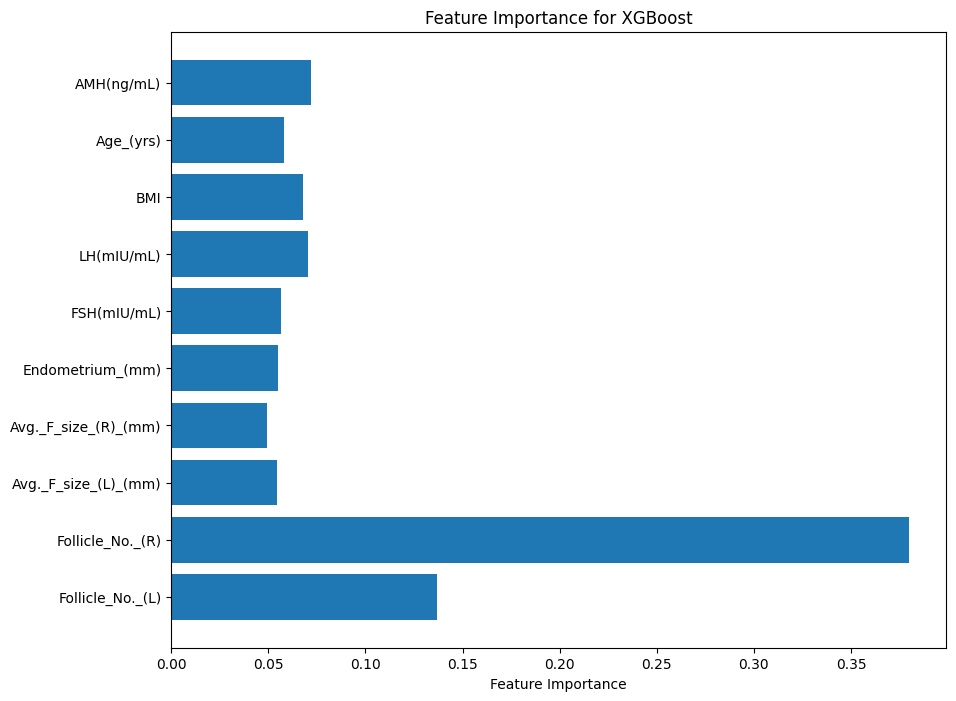

In [20]:
# Fit the XGBoost model before accessing feature importance
xgb_best.fit(X_train, y_train)

# Now plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(X.columns, xgb_best.feature_importances_)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for XGBoost')
plt.show()
